## Festivals in Karnataka
https://www.karnataka.com/festivals/festivals-of-karnataka/

In [1]:
#Importing necessary libraries

import pandas as pd
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
res = requests.get("https://www.karnataka.com/festivals/festivals-of-karnataka/")
res.status_code

200

In [4]:
soup = BeautifulSoup(res.text, 'lxml')

In [5]:
#prettify() method will turn a Beautiful Soup parse tree into a nicely formatted Unicode string 
print(soup.prettify())

<!DOCTYPE html>
<html lang="en-US" prefix="og: http://ogp.me/ns#">
 <head>
  <link href="https://www.karnataka.com/festivals/festivals-of-karnataka/" rel="canonical"/>
  <meta content="en-US" name="dc.language"/>
  <meta content="en_US" name="dc.language.iso"/>
  <meta content="Raggi Mudde" name="dc.publisher"/>
  <meta content="Festivals of Karnataka- The A to Z" name="dc.title"/>
  <meta content="Festivals of Karnataka. Know more about the festivals of Karnataka including Dussera, Vara Mahalakshmi, Kambala and Pongal." name="dc.description"/>
  <meta content="2017-03-15" name="dc.date.issued"/>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <style type="text/css">
   a,.srp-post-title-link{font-size:1.5rem}
  </style>
  <link href="https://cdn.karnataka.com/wp-content/cache/autoptimize/css/autoptimize_a1852215185e7e76cc014df154efb00c.css" media="all" rel="stylesheet" type="text/css"/>
  <title>
   Festivals of Karnataka | Karnataka

In [6]:
text = soup.find('div', {'class': 'entry-content'})
text.get_text()

'\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\nKarnataka is a vibrant state famous for its grand festivals.\xa0 Many festivals of Karnataka are conducted in the name of art, religion, seasons etc. The famous Dussera festival of Mysore to Kambala Buffalo race in Mangalore, the state is full of festivals and fiestas. Karnataka is also known for its heritage and culture; the state has a wide range of celebrations that truly keeps the audience off their feet.\nHere are few important festivals of Karnataka:\nGanesha Chaturthi\nGanesha idol in front of Ulsoor temple, Bangalore\nThe months of August-September one can witness hundreds of rath yathras on the streets of Karnataka. The 10-days festival is celebrated from the Shukla Chaturthi that lasts till the Anantha Chaturdashi. The streets will be clad with wax and clay models of Ganesha and people offering their prayers to the idols. The 10 days are celebrated with great percussions and poojas with hundreds of people witnessing it. The pras

In [7]:
type(text)

bs4.element.Tag

In [8]:
text = text.getText()

In [9]:
type(text)

str

In [10]:
len(text)

8819

In [11]:
text = text.replace('\n\n\n(adsbygoogle = window.adsbygoogle || []).push({});\n\n\n.sqnui5c49e3c187729{margin:5px;padding:0}@media screen and (min-width:1201px){.sqnui5c49e3c187729{display:block}}@media screen and (min-width:993px) and (max-width:1200px){.sqnui5c49e3c187729{display:block}}@media screen and (min-width:769px) and (max-width:992px){.sqnui5c49e3c187729{display:block}}@media screen and (min-width:768px) and (max-width:768px){.sqnui5c49e3c187729{display:block}}@media screen and (max-width:767px){.sqnui5c49e3c187729{display:block}}\n',"")
text

'\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\nKarnataka is a vibrant state famous for its grand festivals.\xa0 Many festivals of Karnataka are conducted in the name of art, religion, seasons etc. The famous Dussera festival of Mysore to Kambala Buffalo race in Mangalore, the state is full of festivals and fiestas. Karnataka is also known for its heritage and culture; the state has a wide range of celebrations that truly keeps the audience off their feet.\nHere are few important festivals of Karnataka:\nGanesha Chaturthi\nGanesha idol in front of Ulsoor temple, Bangalore\nThe months of August-September one can witness hundreds of rath yathras on the streets of Karnataka. The 10-days festival is celebrated from the Shukla Chaturthi that lasts till the Anantha Chaturdashi. The streets will be clad with wax and clay models of Ganesha and people offering their prayers to the idols. The 10 days are celebrated with great percussions and poojas with hundreds of people witnessing it. The pras

In [12]:
text

'\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\nKarnataka is a vibrant state famous for its grand festivals.\xa0 Many festivals of Karnataka are conducted in the name of art, religion, seasons etc. The famous Dussera festival of Mysore to Kambala Buffalo race in Mangalore, the state is full of festivals and fiestas. Karnataka is also known for its heritage and culture; the state has a wide range of celebrations that truly keeps the audience off their feet.\nHere are few important festivals of Karnataka:\nGanesha Chaturthi\nGanesha idol in front of Ulsoor temple, Bangalore\nThe months of August-September one can witness hundreds of rath yathras on the streets of Karnataka. The 10-days festival is celebrated from the Shukla Chaturthi that lasts till the Anantha Chaturdashi. The streets will be clad with wax and clay models of Ganesha and people offering their prayers to the idols. The 10 days are celebrated with great percussions and poojas with hundreds of people witnessing it. The pras

## Tokenization

Tokenization is the process of breaking up the given text into smaller units called tokens. The tokens may be words or number or punctuation mark. Tokenization does this task by locating word boundaries. Ending point of a word and beginning of the next word is called word boundaries.

In [13]:
#Word tokenizer
from nltk.tokenize import word_tokenize
word_tokenize(text)

['Karnataka',
 'is',
 'a',
 'vibrant',
 'state',
 'famous',
 'for',
 'its',
 'grand',
 'festivals',
 '.',
 'Many',
 'festivals',
 'of',
 'Karnataka',
 'are',
 'conducted',
 'in',
 'the',
 'name',
 'of',
 'art',
 ',',
 'religion',
 ',',
 'seasons',
 'etc',
 '.',
 'The',
 'famous',
 'Dussera',
 'festival',
 'of',
 'Mysore',
 'to',
 'Kambala',
 'Buffalo',
 'race',
 'in',
 'Mangalore',
 ',',
 'the',
 'state',
 'is',
 'full',
 'of',
 'festivals',
 'and',
 'fiestas',
 '.',
 'Karnataka',
 'is',
 'also',
 'known',
 'for',
 'its',
 'heritage',
 'and',
 'culture',
 ';',
 'the',
 'state',
 'has',
 'a',
 'wide',
 'range',
 'of',
 'celebrations',
 'that',
 'truly',
 'keeps',
 'the',
 'audience',
 'off',
 'their',
 'feet',
 '.',
 'Here',
 'are',
 'few',
 'important',
 'festivals',
 'of',
 'Karnataka',
 ':',
 'Ganesha',
 'Chaturthi',
 'Ganesha',
 'idol',
 'in',
 'front',
 'of',
 'Ulsoor',
 'temple',
 ',',
 'Bangalore',
 'The',
 'months',
 'of',
 'August-September',
 'one',
 'can',
 'witness',
 'hundr

In [14]:
#Punctuation based tokenizer
from nltk.tokenize import WordPunctTokenizer
word_punct_tokenizer = WordPunctTokenizer()
word_punct_tokenizer.tokenize(text)

['Karnataka',
 'is',
 'a',
 'vibrant',
 'state',
 'famous',
 'for',
 'its',
 'grand',
 'festivals',
 '.',
 'Many',
 'festivals',
 'of',
 'Karnataka',
 'are',
 'conducted',
 'in',
 'the',
 'name',
 'of',
 'art',
 ',',
 'religion',
 ',',
 'seasons',
 'etc',
 '.',
 'The',
 'famous',
 'Dussera',
 'festival',
 'of',
 'Mysore',
 'to',
 'Kambala',
 'Buffalo',
 'race',
 'in',
 'Mangalore',
 ',',
 'the',
 'state',
 'is',
 'full',
 'of',
 'festivals',
 'and',
 'fiestas',
 '.',
 'Karnataka',
 'is',
 'also',
 'known',
 'for',
 'its',
 'heritage',
 'and',
 'culture',
 ';',
 'the',
 'state',
 'has',
 'a',
 'wide',
 'range',
 'of',
 'celebrations',
 'that',
 'truly',
 'keeps',
 'the',
 'audience',
 'off',
 'their',
 'feet',
 '.',
 'Here',
 'are',
 'few',
 'important',
 'festivals',
 'of',
 'Karnataka',
 ':',
 'Ganesha',
 'Chaturthi',
 'Ganesha',
 'idol',
 'in',
 'front',
 'of',
 'Ulsoor',
 'temple',
 ',',
 'Bangalore',
 'The',
 'months',
 'of',
 'August',
 '-',
 'September',
 'one',
 'can',
 'witness

In [15]:
#Compute the word frequency with Split
def wordfreq(str):
    word_freq={}
    for tok in str.split():
        if tok.lower() in word_freq:
            word_freq [tok.lower()]+=1
        else:
            word_freq [tok.lower()]=1
    return word_freq

In [16]:
new_tokens = wordfreq(text) 

In [17]:
import operator
sorted_d = sorted(new_tokens.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])

[('the', 133), ('of', 58), ('is', 53), ('and', 39), ('festival', 37), ('to', 31), ('a', 27), ('in', 26), ('with', 21), ('karnataka', 17), ('on', 14), ('are', 13), ('for', 11), ('conducted', 11), ('celebrated', 11), ('that', 10), ('this', 10), ('people', 9), ('by', 9), ('as', 7), ('day', 7), ('goddess', 7), ('it', 7), ('state', 6), ('from', 6)]


<FreqDist with 559 samples and 1344 outcomes>
[('the', 133), ('of', 58), ('is', 53), ('and', 39), ('festival', 37), ('to', 31), ('a', 27), ('in', 26), ('with', 21), ('karnataka', 17), ('on', 14), ('are', 13), ('for', 11), ('conducted', 11), ('celebrated', 11), ('that', 10), ('this', 10), ('people', 9), ('by', 9), ('as', 7), ('day', 7), ('goddess', 7), ('it', 7), ('state', 6), ('from', 6)]


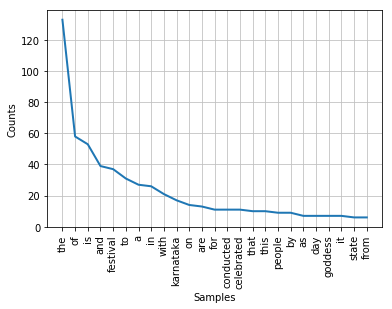

In [18]:
import nltk
Freq_dist_nltk=nltk.FreqDist(new_tokens)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

## Sopword Removal

They are common words that do not contribute much to the content or meaning of a document. Stopwords add noise to bag-of-words comparisons, so they are usually excluded.

Stopwords are common language words such as articles (a, an, the, etc.) and other tokens that may have less value for searching.

#### Drawbacks:
By removing the stop words we are reducing our ability to perform certain types of searches. Filtering out the words prevents us from doing the following:

- Distinguishing happy from not happy.
- Searching for the band The The.
- Finding Shakespeare’s quotation “To be, or not to be”
- Using the country code for India: IN 

In [19]:
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')
stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [20]:
from nltk.tokenize import word_tokenize
words = word_tokenize(text.lower())

In [21]:
wordsFiltered = []
 
for w in words:
    if w not in stopwords:
        wordsFiltered.append(w)

In [22]:
print(wordsFiltered)

['karnataka', 'vibrant', 'state', 'famous', 'grand', 'festivals', '.', 'many', 'festivals', 'karnataka', 'conducted', 'name', 'art', ',', 'religion', ',', 'seasons', 'etc', '.', 'famous', 'dussera', 'festival', 'mysore', 'kambala', 'buffalo', 'race', 'mangalore', ',', 'state', 'full', 'festivals', 'fiestas', '.', 'karnataka', 'also', 'known', 'heritage', 'culture', ';', 'state', 'wide', 'range', 'celebrations', 'truly', 'keeps', 'audience', 'feet', '.', 'important', 'festivals', 'karnataka', ':', 'ganesha', 'chaturthi', 'ganesha', 'idol', 'front', 'ulsoor', 'temple', ',', 'bangalore', 'months', 'august-september', 'one', 'witness', 'hundreds', 'rath', 'yathras', 'streets', 'karnataka', '.', '10-days', 'festival', 'celebrated', 'shukla', 'chaturthi', 'lasts', 'till', 'anantha', 'chaturdashi', '.', 'streets', 'clad', 'wax', 'clay', 'models', 'ganesha', 'people', 'offering', 'prayers', 'idols', '.', '10', 'days', 'celebrated', 'great', 'percussions', 'poojas', 'hundreds', 'people', 'witne

In [23]:
wordsFiltered2 = []
stopWords2 = ['"', "(",")", ".",",", '-',"–", '?', 'more', '=', '$', '/', '%',"立国一代","200,000","2020","’","“","”","99","30","40","@","{","}","3"]
for w in wordsFiltered:
    if w not in stopWords2:
        wordsFiltered2.append(w)

In [24]:
print(wordsFiltered2)

['karnataka', 'vibrant', 'state', 'famous', 'grand', 'festivals', 'many', 'festivals', 'karnataka', 'conducted', 'name', 'art', 'religion', 'seasons', 'etc', 'famous', 'dussera', 'festival', 'mysore', 'kambala', 'buffalo', 'race', 'mangalore', 'state', 'full', 'festivals', 'fiestas', 'karnataka', 'also', 'known', 'heritage', 'culture', ';', 'state', 'wide', 'range', 'celebrations', 'truly', 'keeps', 'audience', 'feet', 'important', 'festivals', 'karnataka', ':', 'ganesha', 'chaturthi', 'ganesha', 'idol', 'front', 'ulsoor', 'temple', 'bangalore', 'months', 'august-september', 'one', 'witness', 'hundreds', 'rath', 'yathras', 'streets', 'karnataka', '10-days', 'festival', 'celebrated', 'shukla', 'chaturthi', 'lasts', 'till', 'anantha', 'chaturdashi', 'streets', 'clad', 'wax', 'clay', 'models', 'ganesha', 'people', 'offering', 'prayers', 'idols', '10', 'days', 'celebrated', 'great', 'percussions', 'poojas', 'hundreds', 'people', 'witnessing', 'prasadam', 'offered', 'modak', 'pooja', 'conti

<FreqDist with 447 samples and 792 outcomes>
[('festival', 41), ('karnataka', 23), ('conducted', 12), ('celebrated', 12), ('people', 11), ('day', 10), ('pooja', 8), ('statue', 8), ('state', 7), ('goddess', 7), ('festivals', 6), ('kambala', 6), ('great', 6), ('karaga', 6), ('new', 6), ('also', 5), ('ganesha', 5), ('month', 5), ('gowri', 5), ('year', 5), ('pongal', 5), ('famous', 4), ('mysore', 4), ('race', 4), ('chaturthi', 4)]


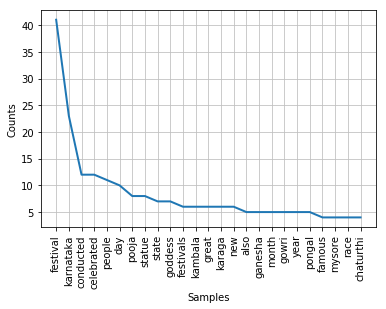

In [25]:
Freq_dist_nltk=nltk.FreqDist(wordsFiltered2)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

## Stemming

Stemming work by cutting off the end or the beginning of the word, taking into account a list of common prefixes and suffixes that can be found in an inflected word. This indiscriminate cutting can be successful in some occasions, but not always, and that this approach presents some limitations.

In [26]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_text=[]
for word in wordsFiltered2:
    stemmed_text.append(ps.stem(word))

In [27]:
stemmed_text[:5]

['karnataka', 'vibrant', 'state', 'famou', 'grand']

In [28]:
len(stemmed_text)

792

In [29]:
def wordfreq2(words):
    word_freq={}
    for tok in words:
        if tok in word_freq:
            word_freq[tok] +=1
        else:
            word_freq[tok] =1
    return word_freq
wordfreq2(stemmed_text)

{'karnataka': 23,
 'vibrant': 1,
 'state': 7,
 'famou': 4,
 'grand': 3,
 'festiv': 47,
 'mani': 2,
 'conduct': 13,
 'name': 1,
 'art': 3,
 'religion': 2,
 'season': 1,
 'etc': 3,
 'dussera': 3,
 'mysor': 4,
 'kambala': 6,
 'buffalo': 5,
 'race': 6,
 'mangalor': 2,
 'full': 2,
 'fiesta': 1,
 'also': 5,
 'known': 2,
 'heritag': 1,
 'cultur': 4,
 ';': 1,
 'wide': 2,
 'rang': 1,
 'celebr': 18,
 'truli': 1,
 'keep': 1,
 'audienc': 1,
 'feet': 1,
 'import': 1,
 ':': 3,
 'ganesha': 5,
 'chaturthi': 4,
 'idol': 2,
 'front': 1,
 'ulsoor': 1,
 'templ': 7,
 'bangalor': 2,
 'month': 6,
 'august-septemb': 1,
 'one': 3,
 'wit': 3,
 'hundr': 2,
 'rath': 1,
 'yathra': 1,
 'street': 4,
 '10-day': 2,
 'shukla': 1,
 'last': 4,
 'till': 2,
 'anantha': 1,
 'chaturdashi': 1,
 'clad': 1,
 'wax': 1,
 'clay': 1,
 'model': 1,
 'peopl': 11,
 'offer': 9,
 'prayer': 2,
 '10': 1,
 'day': 14,
 'great': 6,
 'percuss': 2,
 'pooja': 10,
 'prasadam': 1,
 'modak': 1,
 'continu': 1,
 '9': 1,
 'visarjan': 2,
 'pomp': 2,
 '

<FreqDist with 408 samples and 792 outcomes>
[('festiv', 47), ('karnataka', 23), ('celebr', 18), ('day', 14), ('conduct', 13), ('peopl', 11), ('pooja', 10), ('offer', 9), ('statu', 8), ('state', 7), ('templ', 7), ('goddess', 7), ('kambala', 6), ('race', 6), ('month', 6), ('great', 6), ('karaga', 6), ('year', 6), ('new', 6), ('buffalo', 5), ('also', 5), ('ganesha', 5), ('gowri', 5), ('pongal', 5), ('famou', 4)]


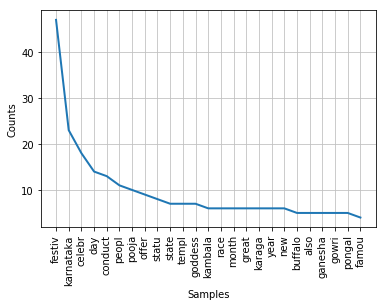

In [30]:
Freq_dist_nltk=nltk.FreqDist(wordfreq2(stemmed_text))
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

## Lematization

Lemmatization, takes into consideration the morphological analysis of the words. To do so, it is necessary to have detailed dictionaries which the algorithm can look through to link the form back to its lemma. Again, you can see how it works with the same example words.

Important difference between Stemming and Lematization is that a lemma is the base form of all its inflectional forms, whereas a stem isn’t. This is why regular dictionaries are lists of lemmas, not stems.

In [31]:
from nltk.stem import WordNetLemmatizer, PorterStemmer

ps = PorterStemmer()
wnl = WordNetLemmatizer()
text_lematization_and_stemming=[]
for word in wordsFiltered2:
    text_lematization_and_stemming.append(wnl.lemmatize(word) if wnl.lemmatize(word).endswith('e') else ps.stem(word))

In [32]:
len(text_lematization_and_stemming)

792

In [33]:
# Only using Lematization
text_lema=[]
for word in wordsFiltered2:
    text_lema.append(wnl.lemmatize(word))

In [34]:
len(text_lema)

text_lema = [w.replace('karnataka', 'Karnataka') for w in text_lema]
final_text = (" ").join(text_lema)


792

In [35]:
wordfreq2(text_lema)

{'Karnataka': 23,
 'vibrant': 1,
 'state': 7,
 'famous': 4,
 'grand': 3,
 'festival': 47,
 'many': 2,
 'conducted': 12,
 'name': 1,
 'art': 3,
 'religion': 2,
 'season': 1,
 'etc': 3,
 'dussera': 3,
 'mysore': 4,
 'kambala': 6,
 'buffalo': 5,
 'race': 4,
 'mangalore': 2,
 'full': 2,
 'fiesta': 1,
 'also': 5,
 'known': 2,
 'heritage': 1,
 'culture': 1,
 ';': 1,
 'wide': 1,
 'range': 1,
 'celebration': 3,
 'truly': 1,
 'keep': 1,
 'audience': 1,
 'foot': 1,
 'important': 1,
 ':': 3,
 'ganesha': 5,
 'chaturthi': 4,
 'idol': 2,
 'front': 1,
 'ulsoor': 1,
 'temple': 7,
 'bangalore': 2,
 'month': 6,
 'august-september': 1,
 'one': 3,
 'witness': 1,
 'hundred': 2,
 'rath': 1,
 'yathras': 1,
 'street': 4,
 '10-days': 2,
 'celebrated': 12,
 'shukla': 1,
 'last': 4,
 'till': 2,
 'anantha': 1,
 'chaturdashi': 1,
 'clad': 1,
 'wax': 1,
 'clay': 1,
 'model': 1,
 'people': 11,
 'offering': 3,
 'prayer': 2,
 '10': 1,
 'day': 14,
 'great': 6,
 'percussion': 2,
 'poojas': 2,
 'witnessing': 1,
 'prasada

<FreqDist with 428 samples and 792 outcomes>
[('festival', 47), ('Karnataka', 23), ('day', 14), ('conducted', 12), ('celebrated', 12), ('people', 11), ('pooja', 8), ('statue', 8), ('state', 7), ('temple', 7), ('goddess', 7), ('kambala', 6), ('month', 6), ('great', 6), ('karaga', 6), ('year', 6), ('new', 6), ('buffalo', 5), ('also', 5), ('ganesha', 5), ('gowri', 5), ('pongal', 5), ('famous', 4), ('mysore', 4), ('race', 4)]


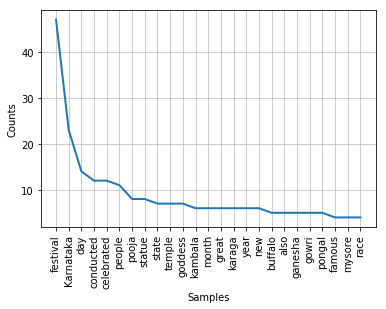

In [36]:
Freq_dist_nltk=nltk.FreqDist(wordfreq2(text_lema))
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

## Frequency Table

In [37]:
#Calling the wordfreq2 function which we have already created

Freq_dist_nltk=nltk.FreqDist(wordfreq2(text_lema))
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)

In [38]:
labels = ['Words', 'Frequency']
df = pd.DataFrame.from_records(sorted_d, columns=labels)

### Top 10 Words with high Frequency

In [39]:
df = df.head(10)
df

,Words,Frequency
0,festival,47
1,Karnataka,23
2,day,14
3,conducted,12
4,celebrated,12
5,people,11
6,pooja,8
7,statue,8
8,state,7
9,temple,7


## Frequency Distribution Plotted in a Bar Chart

In [40]:
def plot_bar(x_axis, y_axis):
    index = np.arange(len(x_axis))
    plt.barh(x_axis, y_axis, color=(0.2, 0.4, 0.6, 0.6), edgecolor='blue')
    plt.xlabel('Frequency', fontsize=15)
    plt.ylabel('Words', fontsize=15)
    #plt.xticks(x_axis, y_axis, fontsize=20)
    plt.title('Frequency Distribution of Words', fontsize=20)
    plt.gca().invert_yaxis()
    plt.show()

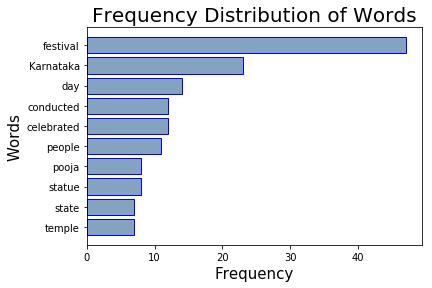

In [41]:
# Plot for the frequency of first 10 words in speech text

plot_bar(df['Words'], df['Frequency'])

## Creating Word Cloud using WordCloud Library

Word clouds are graphical representations of word frequency that give greater prominence to words that appear more frequently in a source text. The larger the word in the visual the more common the word was in the document(s). This type of visualization can assist evaluators with exploratory textual analysis by identifying words that frequently appear in a set of interviews, documents, or other text. It can also be used for communicating the most salient points or themes in the reporting stage. 

In [52]:
#Function to mask a image's outline for fitting the wordcloud

def generate_wordcloud(words, mask):
    word_cloud = WordCloud(width = 512, colormap="viridis", height = 512,max_font_size=100, max_words=3000, background_color='white', stopwords=STOPWORDS, mask=mask, contour_color="black").generate(words)
    plt.figure(figsize=(20,20),facecolor = 'white', edgecolor='black')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    plt.savefig("Merck_wordcloud.png")
    

    #Function to mask a image's outline for fitting the wordcloud and color the wordcloud based on the original image color

def generate_wordcloud_imageColor(words, mask):

    stopwords = set(STOPWORDS)

    wc = WordCloud(max_words=4000,mask=mask,background_color='white',
                   stopwords=stopwords, max_font_size=50)
    plt.figure(figsize=(15,15), facecolor = 'white', edgecolor='black')
    wc.generate(words)
    image_colors = ImageColorGenerator(mask)
    plt.imshow(wc, interpolation="bilinear")
    plt.imshow(wc.recolor(color_func=image_colors, random_state=3))
    plt.axis('off')
    plt.show()

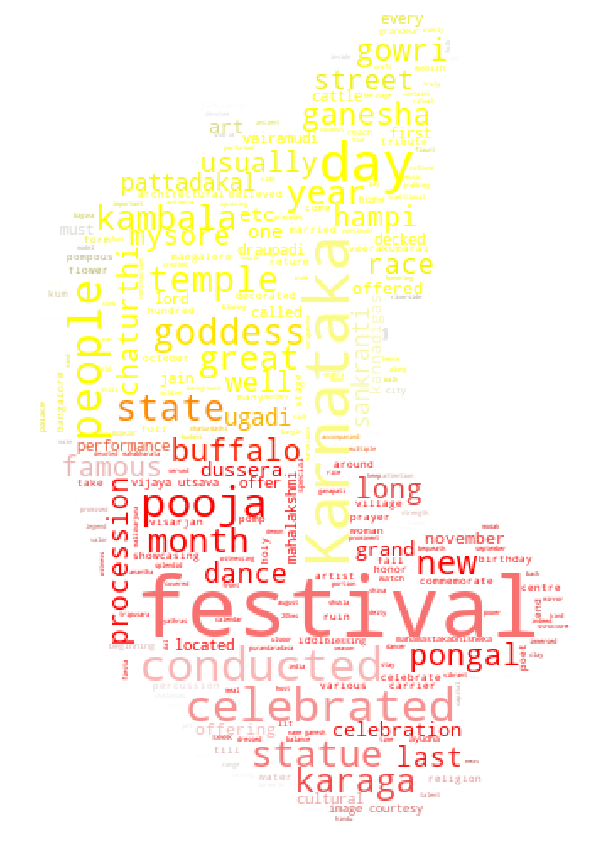

In [59]:
mask = np.array(Image.open("C:\\Users\\MRAVI\Desktop\\Text Analytics\\karnataka3.jpg"))
generate_wordcloud_imageColor(final_text, mask)